In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('cars.csv')

In [3]:
df.head(20)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.
5,23.0,8,350,125,3900,17,1980,US.
6,13.0,8,351,158,4363,13,1974,US.
7,14.0,8,440,215,4312,9,1971,US.
8,25.4,5,183,77,3530,20,1980,Europe.
9,37.7,4,89,62,2050,17,1982,Japan.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [5]:
df.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')

<AxesSubplot:>

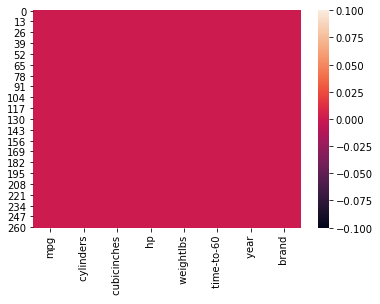

In [6]:
sns.heatmap(df.isnull())

<AxesSubplot:>

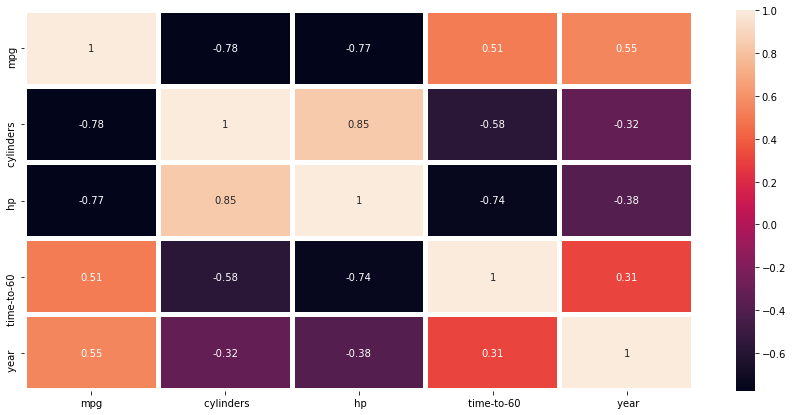

In [7]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr() , annot=True,   linewidths=4)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [9]:
df.columns

Index(['mpg', ' cylinders', ' cubicinches', ' hp', ' weightlbs', ' time-to-60',
       ' year', ' brand'],
      dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder


In [11]:
le=LabelEncoder()

In [12]:
df['BR'] = le.fit_transform(df[' brand'])

In [13]:
df['BR'].value_counts()

2    162
1     51
0     48
Name: BR, dtype: int64

In [14]:
df.drop(' brand',axis=1,inplace=True)


In [15]:
print(type(df[' cubicinches'][1]))
print(type(df[' weightlbs'][1]))

<class 'str'>
<class 'str'>


In [16]:
df['cubin']=le.fit_transform(df[' cubicinches'])

In [17]:
df['weight']=le.fit_transform(df[' weightlbs'])

In [18]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,BR,cubin,weight
0,14.0,8,350,165,4209,12,1972,2,47,208
1,31.9,4,89,71,1925,14,1980,0,69,12
2,17.0,8,302,140,3449,11,1971,2,41,162
3,15.0,8,400,150,3761,10,1971,2,52,181
4,30.5,4,98,63,2051,17,1978,2,74,28


In [19]:
df.drop([' cubicinches',' weightlbs'],axis=1 ,inplace=True)

In [20]:
df.head()

,mpg,cylinders,hp,time-to-60,year,BR,cubin,weight
0,14.0,8,165,12,1972,2,47,208
1,31.9,4,71,14,1980,0,69,12
2,17.0,8,140,11,1971,2,41,162
3,15.0,8,150,10,1971,2,52,181
4,30.5,4,63,17,1978,2,74,28


In [21]:
df.values[1]

array([  31.9,    4. ,   71. ,   14. , 1980. ,    0. ,   69. ,   12. ])

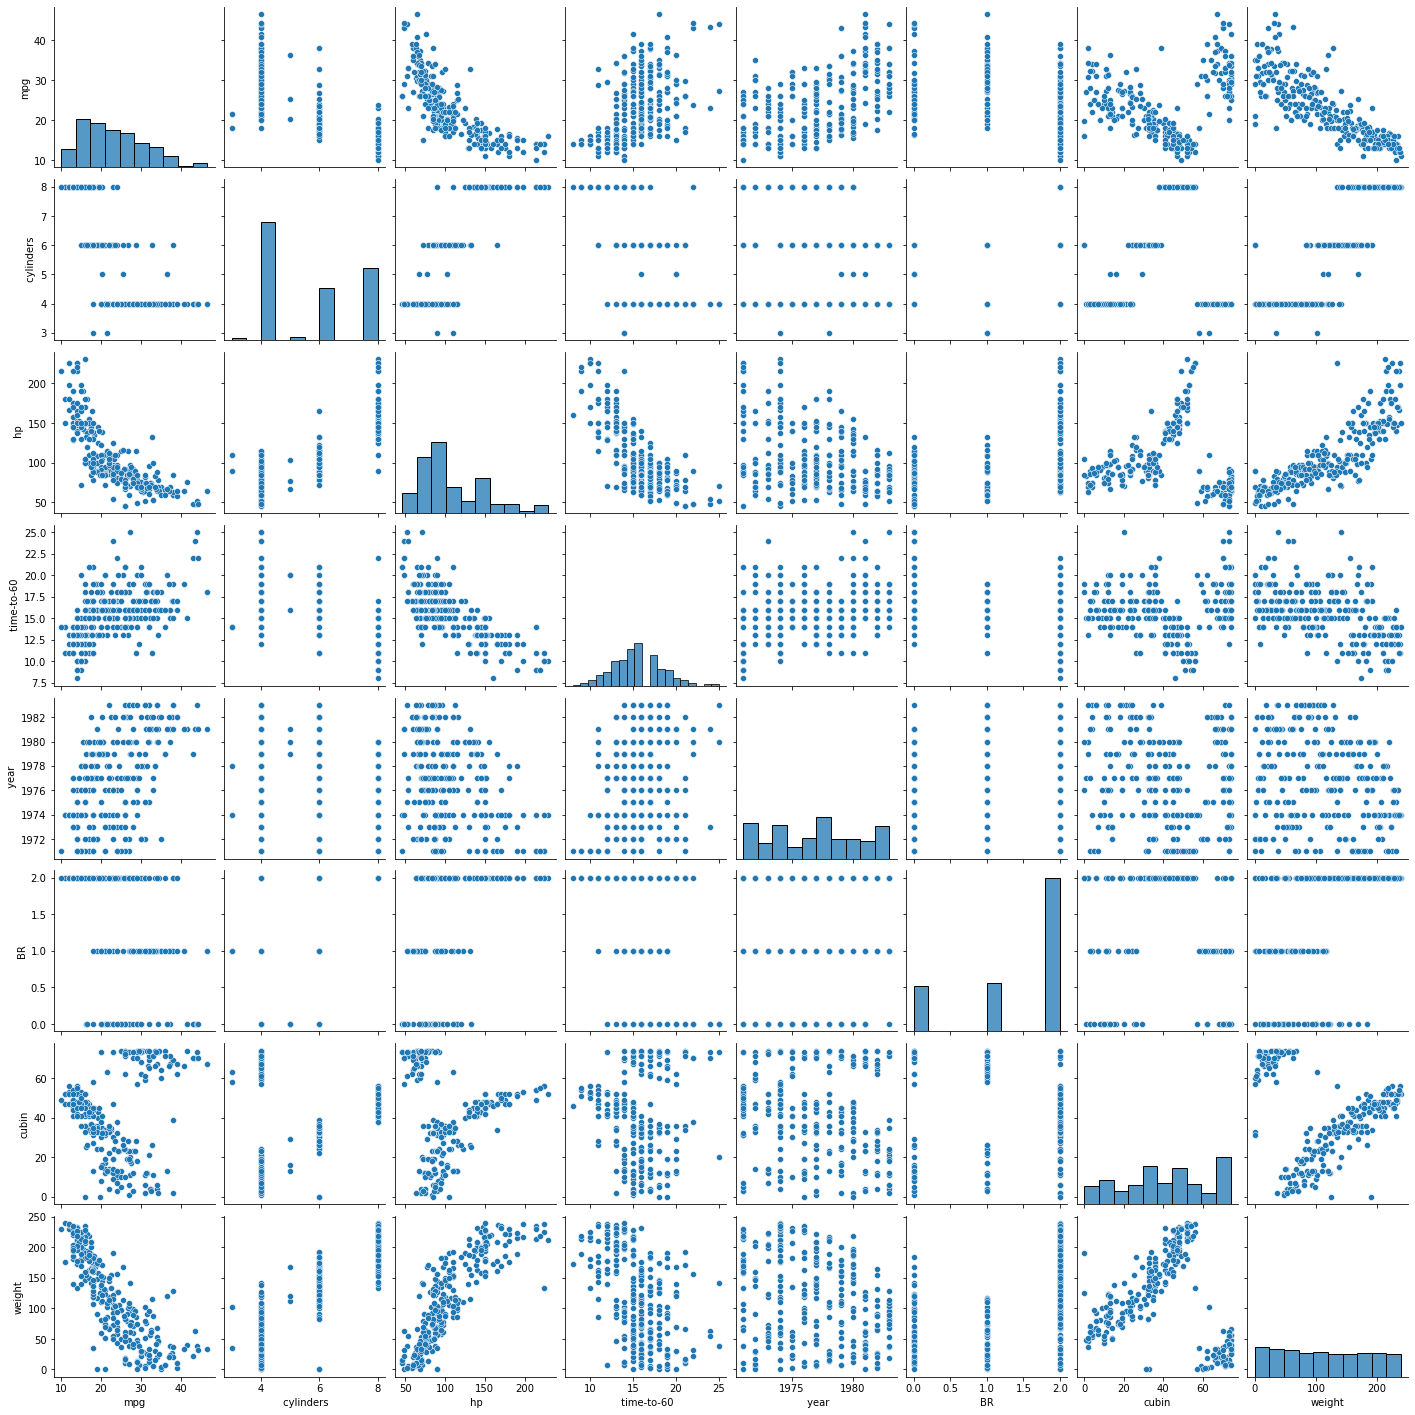

In [64]:
sns.pairplot(df)

In [22]:
from sklearn.cluster import KMeans

In [23]:
km=KMeans(n_clusters=261) #cluster randomly taken

In [24]:
km.fit(df)

KMeans(n_clusters=261)

In [25]:
km.inertia_

0.0

In [26]:
wcss=[]
for i in range(1,11):
    km=KMeans(i)
    km.fit(df)
    wcss.append(km.inertia_)

In [27]:
wcss

[1863640.6282758624,
 654626.8222857146,
 339431.98390437703,
 226386.7592064023,
 179464.83248761934,
 150901.83568687615,
 131281.75136595423,
 113454.62217165454,
 102268.15700423701,
 94485.77109904976]

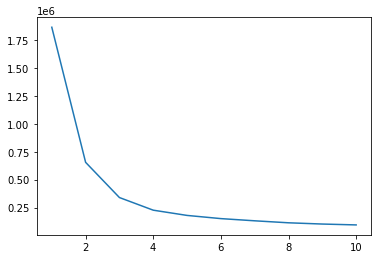

In [28]:
plt.plot(range(1,11),wcss)

In [29]:
km=KMeans(n_clusters=4,init='k-means++')


In [30]:
km.fit(df)

KMeans(n_clusters=4)

In [31]:
y=km.fit_predict(df)

In [32]:
y

array([1, 0, 2, 1, 0, 1, 1, 1, 2, 0, 3, 0, 1, 1, 0, 1, 0, 1, 3, 3, 0, 3,
       2, 1, 0, 0, 0, 1, 2, 0, 0, 2, 3, 0, 0, 2, 0, 2, 1, 2, 2, 1, 2, 2,
       1, 3, 1, 3, 0, 2, 1, 2, 1, 3, 1, 1, 2, 0, 0, 1, 2, 3, 2, 0, 1, 2,
       0, 0, 0, 1, 2, 3, 0, 3, 0, 2, 2, 3, 0, 3, 1, 1, 2, 3, 3, 0, 3, 2,
       0, 3, 0, 3, 1, 2, 0, 2, 1, 2, 1, 2, 1, 1, 0, 3, 3, 3, 0, 0, 3, 2,
       0, 2, 1, 0, 0, 2, 3, 2, 0, 1, 3, 0, 1, 3, 0, 3, 1, 3, 3, 0, 0, 3,
       1, 1, 1, 1, 0, 2, 2, 2, 3, 0, 3, 0, 2, 2, 2, 3, 1, 2, 3, 3, 1, 2,
       3, 2, 0, 0, 3, 2, 2, 1, 2, 2, 0, 2, 2, 3, 2, 3, 3, 2, 0, 3, 3, 0,
       1, 1, 1, 0, 2, 0, 1, 1, 3, 2, 2, 1, 1, 1, 3, 3, 1, 1, 1, 0, 3, 0,
       0, 0, 3, 3, 2, 2, 3, 1, 0, 2, 1, 2, 3, 1, 0, 0, 2, 3, 0, 1, 3, 1,
       2, 3, 1, 2, 1, 0, 1, 0, 3, 3, 1, 3, 3, 1, 2, 0, 1, 2, 0, 3, 1, 2,
       1, 3, 1, 2, 1, 0, 0, 3, 0, 3, 3, 1, 3, 3, 1, 0, 2, 2, 2])

In [49]:
X=df.values


In [50]:
X.shape

(261, 8)

In [34]:
centroids=km.cluster_centers_


In [35]:
centroids

array([[3.16636364e+01, 4.04545455e+00, 6.79545455e+01, 1.74242424e+01,
        1.97734848e+03, 8.33333333e-01, 6.86212121e+01, 2.68181818e+01],
       [1.48000000e+01, 7.97058824e+00, 1.63367647e+02, 1.26323529e+01,
        1.97486765e+03, 2.00000000e+00, 4.74852941e+01, 2.03808824e+02],
       [1.99546875e+01, 5.98437500e+00, 1.02921875e+02, 1.64375000e+01,
        1.97698438e+03, 1.60937500e+00, 3.13281250e+01, 1.43781250e+02],
       [2.64682540e+01, 4.23809524e+00, 8.85555556e+01, 1.58253968e+01,
        1.97820635e+03, 1.28571429e+00, 1.41587302e+01, 7.97460317e+01]])

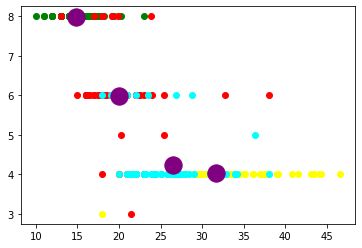

In [51]:
plt.scatter(X[y==0,0]   ,   X[y==0,1]  , color='yellow')
plt.scatter(X[y==1,0]   ,   X[y==1,1]  , color='green')
plt.scatter(X[y==2,0]   ,   X[y==2,1]  , color='red')
plt.scatter(X[y==3,0]   ,   X[y==3,1]  , color='cyan')

plt.scatter(centroids[:,0]  ,  centroids[:,1],  s=300, color = 'purple')

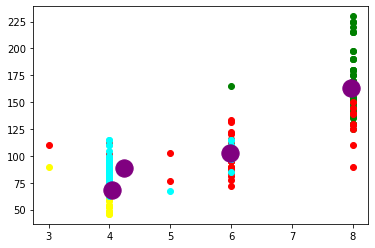

In [52]:
plt.scatter(X[y==0,1]   ,   X[y==0,2]  , color='yellow')
plt.scatter(X[y==1,1]   ,   X[y==1,2]  , color='green')
plt.scatter(X[y==2,1]   ,   X[y==2,2]  , color='red')
plt.scatter(X[y==3,1]   ,   X[y==3,2]  , color='cyan')

plt.scatter(centroids[:,1]  ,  centroids[:,2],  s=300, color = 'purple')

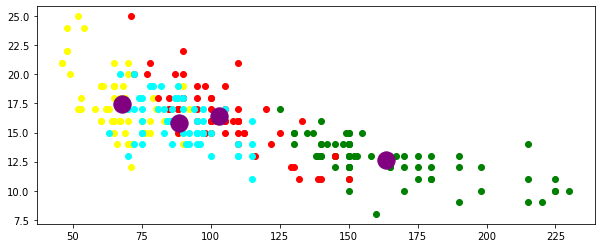

In [53]:
plt.figure(figsize=(10,4))
plt.scatter(X[y==0,2]   ,   X[y==0,3]  , color='yellow')
plt.scatter(X[y==1,2]   ,   X[y==1,3]  , color='green')
plt.scatter(X[y==2,2]   ,   X[y==2,3]  , color='red')
plt.scatter(X[y==3,2]   ,   X[y==3,3]  , color='cyan')

plt.scatter(centroids[:,2]  ,  centroids[:,3],  s=300, color = 'purple')

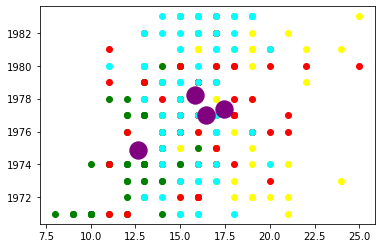

In [54]:
plt.scatter(X[y==0,3]   ,   X[y==0,4]  , color='yellow')
plt.scatter(X[y==1,3]   ,   X[y==1,4]  , color='green')
plt.scatter(X[y==2,3]   ,   X[y==2,4]  , color='red')
plt.scatter(X[y==3,3]   ,   X[y==3,4]  , color='cyan')

plt.scatter(centroids[:,3]  ,  centroids[:,4],  s=300, color = 'purple')

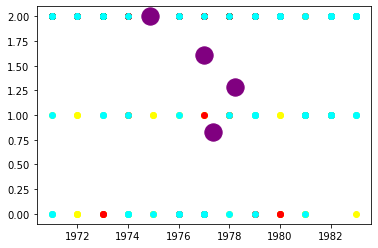

In [55]:
plt.scatter(X[y==0,4]   ,   X[y==0,5]  , color='yellow')
plt.scatter(X[y==1,4]   ,   X[y==1,5]  , color='green')
plt.scatter(X[y==2,4]   ,   X[y==2,5]  , color='red')
plt.scatter(X[y==3,4]   ,   X[y==3,5]  , color='cyan')

plt.scatter(centroids[:,4]  ,  centroids[:,5],  s=300, color = 'purple')

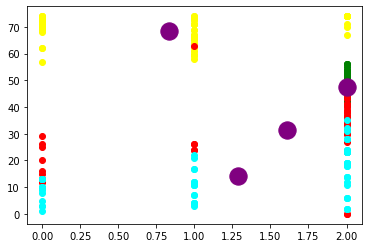

In [56]:
plt.scatter(X[y==0,5]   ,   X[y==0,6]  , color='yellow')
plt.scatter(X[y==1,5]   ,   X[y==1,6]  , color='green')
plt.scatter(X[y==2,5]   ,   X[y==2,6]  , color='red')
plt.scatter(X[y==3,5]   ,   X[y==3,6]  , color='cyan')

plt.scatter(centroids[:,5]  ,  centroids[:,6],  s=300, color = 'purple')

In [57]:
X[1]

array([  31.9,    4. ,   71. ,   14. , 1980. ,    0. ,   69. ,   12. ])

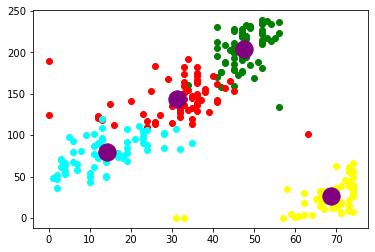

In [58]:
plt.scatter(X[y==0,6]   ,   X[y==0,7]  , color='yellow')
plt.scatter(X[y==1,6]   ,   X[y==1,7]  , color='green')
plt.scatter(X[y==2,6]   ,   X[y==2,7]  , color='red')
plt.scatter(X[y==3,6]   ,   X[y==3,7]  , color='cyan')

plt.scatter(centroids[:,6]  ,  centroids[:,7],  s=300, color = 'purple')

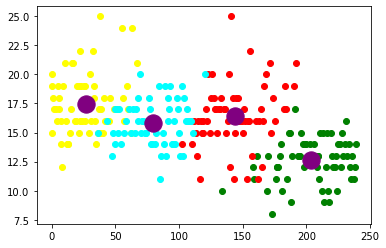

In [59]:
plt.scatter(X[y==0,7]   ,   X[y==0,3]  , color='yellow')
plt.scatter(X[y==1,7]   ,   X[y==1,3]  , color='green')
plt.scatter(X[y==2,7]   ,   X[y==2,3]  , color='red')
plt.scatter(X[y==3,7]   ,   X[y==3,3]  , color='cyan')

plt.scatter(centroids[:,7]  ,  centroids[:,3],  s=300, color = 'purple')